![](http://raw.githubusercontent.com/rohitshirudkar/image/main/Customer%20personality%20analysis.gif?token=GHSAT0AAAAAABVYNNGTRX5IN7ZQ35Q6TRVAYVTKOIA)

*  Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments.
* Finding the potential customers by analysing the behaviour of them is useful to understand the targeted customers.    
* For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyse which customer segment is most likely to buy the product and then market the product only on that particular segment.



   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">UNDERSTANDING THE FEATURES</p> 

### Customer
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES & DATASET</p> 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from datetime import date, datetime

In [2]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Initial Analysis

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Inferences (1)

* The Data Set consists of 2240 Rows and 29 Columns.
* The type of all the variables in the data set are mostly lookslike to be in numerical format (Integer Or Float), except 3 variables (Object / Categorical)
* According to first impressions, only 'income' variable has missing values(24) in the data set.

<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">PREPARATION FOR EDA</p> 

### Correcting The Name Of Columns
* 'MntGoldProds' seems to be wrong

In [6]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

### Correcting The DataType
* Converting Year_Birth and Dt_Customer to datetime format using datetime library

In [7]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Taking Care Of Missing Values

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">FEATURE ENGINEERING</p>

### Examining unique values

In [10]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [11]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()
# we only have data of three years, 2012 to 2014

(2012, 2014)

In [13]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [1, 17, 24, 44, 64, 150],
                         labels = ['Under 18','Young adult','Adult','Middel Aged','Senior Citizen'])

In [14]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [15]:
print(df.shape)
df.head()

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Partner,Education_Level,Children,Year_Joined,Month_Joined,Day_Joined,Age_Group
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,971 days,1617,25,1,No,Graduate,0,2012,April,Monday,Middel Aged
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,125 days,27,6,0,No,Graduate,2,2014,August,Sunday,Middel Aged
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,472 days,776,21,0,Yes,Graduate,0,2013,August,Wednesday,Middel Aged
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,65 days,53,8,0,Yes,Graduate,1,2014,October,Thursday,Adult
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,321 days,422,19,0,Yes,Postgraduate,1,2014,January,Sunday,Adult


In [16]:
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

### Examining Unique Values

In [17]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Education,5
Marital_Status,8
Income,1975
Kidhome,3
Teenhome,3
Recency,100
MntWines,776
MntFruits,158
MntMeatProducts,558
MntFishProducts,182


### List Of Numeric And Categorical Columns

In [18]:
cat_columns = ['Age_Group','Education','Education_Level','Kidhome','Teenhome','Children','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Total_Acc_Cmp','Complain',
               'Partner','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined']

num_columns = []
for col in df.columns:
    if col not in cat_columns :
        num_columns.append(col)

<p style="background-color:#E8E7E7;font-family:verdana;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

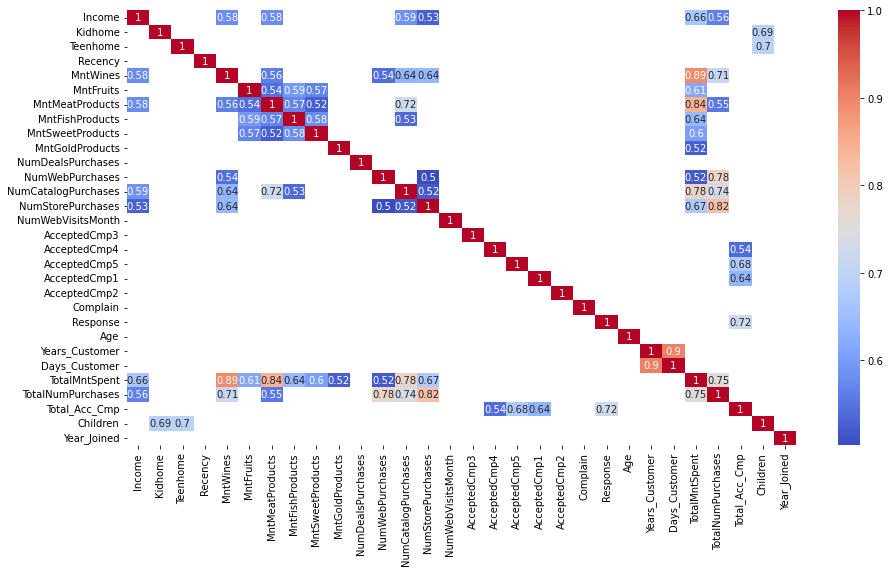

In [19]:
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr>0.5], annot = True, cmap = 'coolwarm')
plt.show()

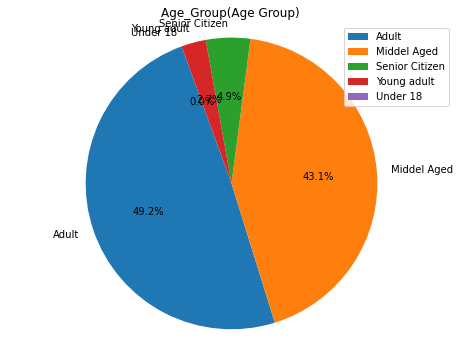

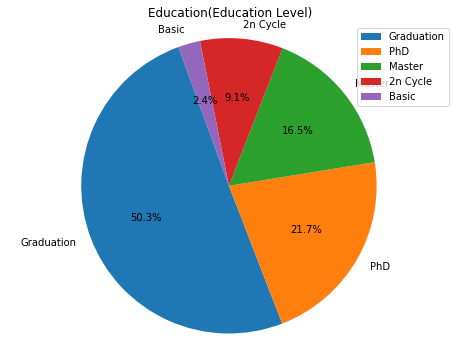

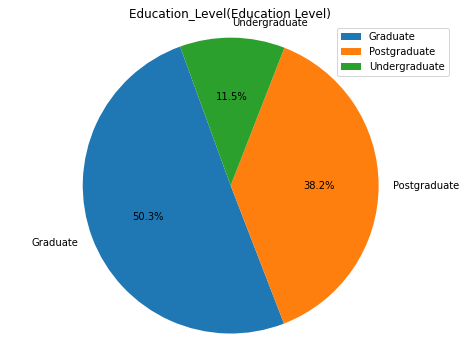

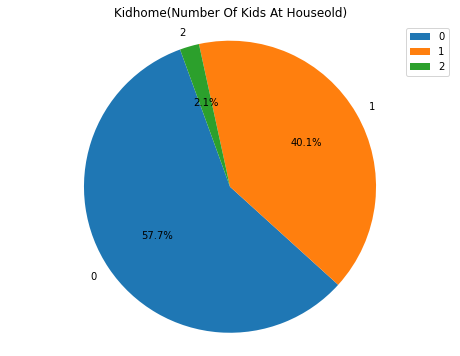

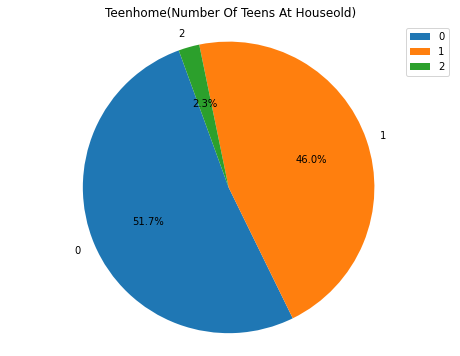

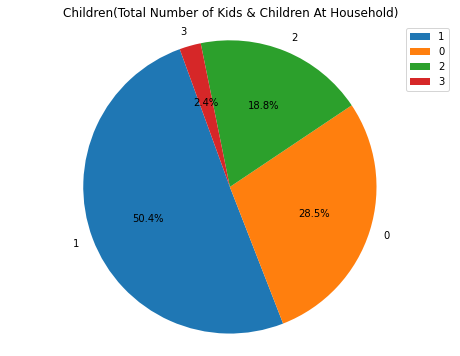

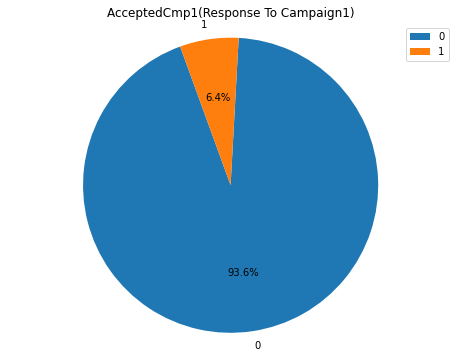

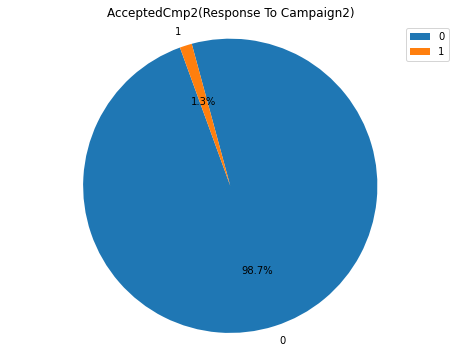

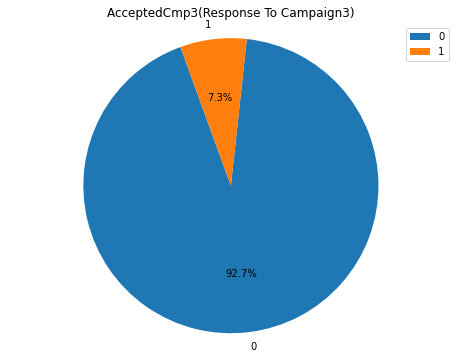

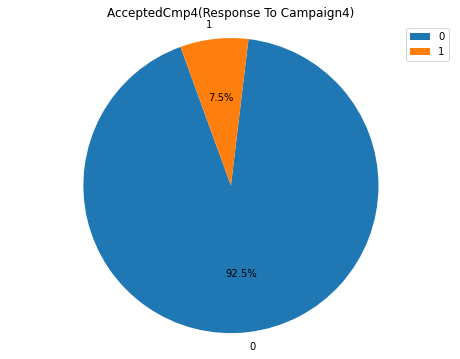

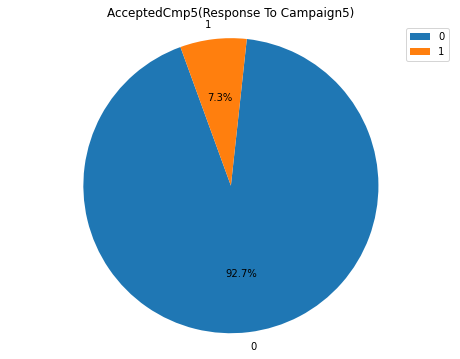

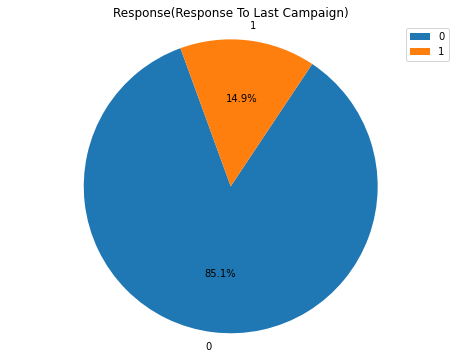

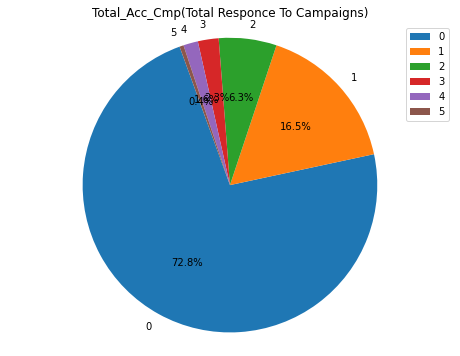

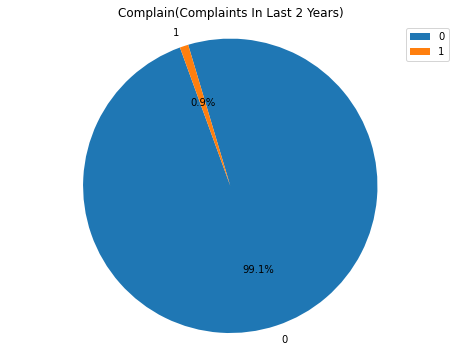

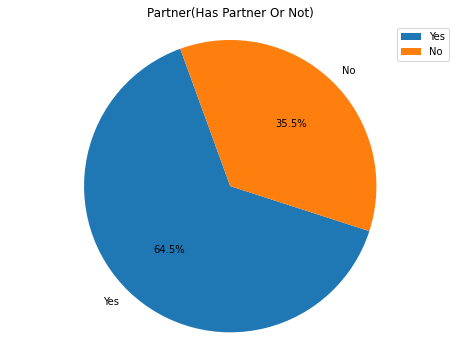

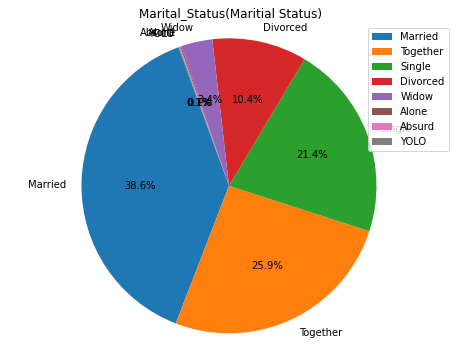

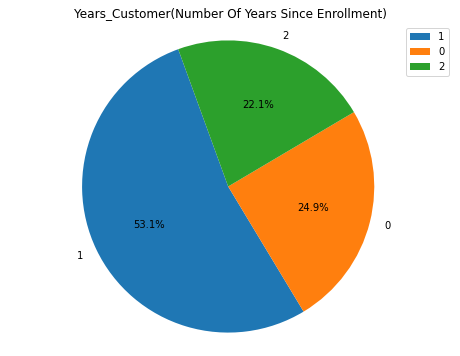

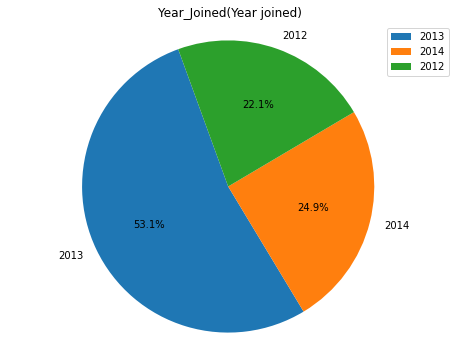

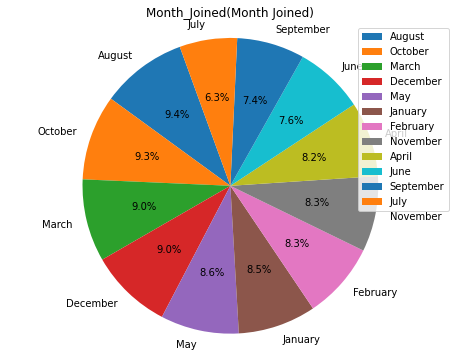

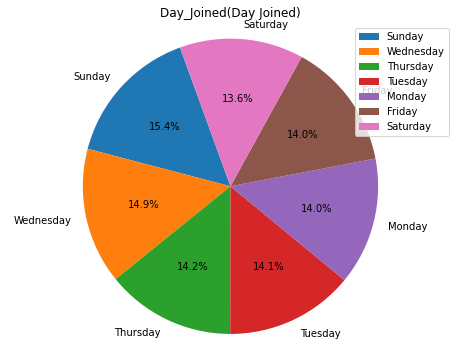

In [20]:
cat_axis_names = ['Age Group','Education Level','Education Level','Number Of Kids At Houseold','Number Of Teens At Houseold','Total Number of Kids & Children At Household','Response To Campaign1','Response To Campaign2','Response To Campaign3','Response To Campaign4','Response To Campaign5','Response To Last Campaign','Total Responce To Campaigns','Complaints In Last 2 Years','Has Partner Or Not','Maritial Status','Number Of Years Since Enrollment','Year joined','Month Joined','Day Joined']

for col, name in list(zip(cat_columns, cat_axis_names)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[col].value_counts().index)
    total_observation_values = list(df[col].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((col + "(" + name + ")")) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

### Inference (2)
**Education:**
* 50% of caustomers are graduates and only 11% of customers are undergraduates, remaining are postgraduates
* So majority of customers are well educated

**KidHome:**
* 58% of customers have no kids in household
* 40% of customers have 1 kid and only 2% of customers have 2 kids in household

**TeenHome:**
* 52% of customers have no Teens in household
* 46% of customers have 1 Teen and 2% cutomers have 2 Teens in household

**50% customers have at least one kid or teen in household**

**AcceptedCmp:**
* Only 6% of customers accepted the offer in campaign 1
* Only 1.3% of customers accepted the offer in campaign 2
* Only 7.3% of customers accepted the offer in campaign 3
* Only 7.5% of customers accepted the offer in campaign 4
* Only 7.3% of customers accepted the offer in campaign 5
* 15% of customers accepted the offer in last campaign
* 73% of customers didnt accepted any offer in any campaign

**Campaing 2 was unsuccessful as compared to others and Majority of customers resposed to last campaign**
**Reapeated targeting might be the key here**

**Compain:**
* Only 1% of customers had any complaint in last 2 years 

**Which is good thing or the customer service is really bad or not working and customer do not even wanna complain about it**

**Partner:**
* 65.5% of customers have partner in life, which makes sense since majority of customers are well educated and ready to settle

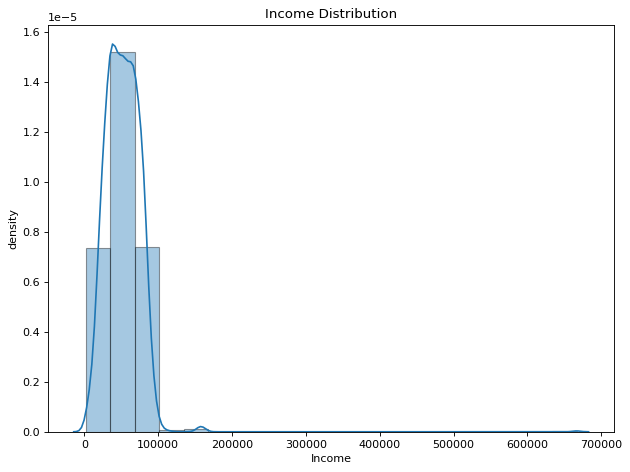

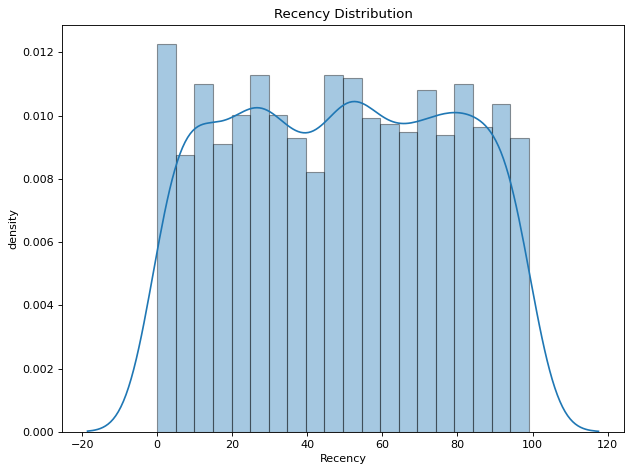

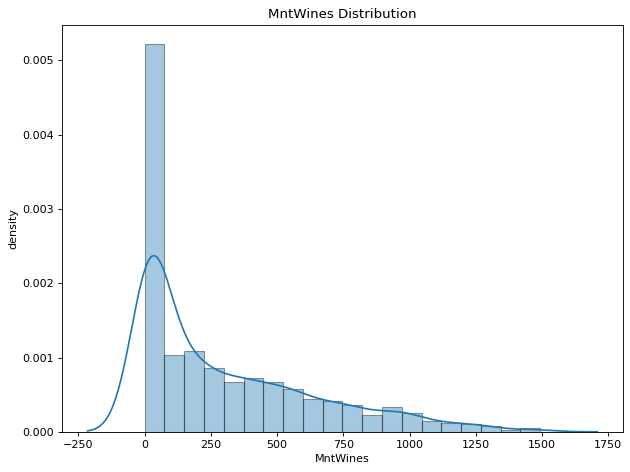

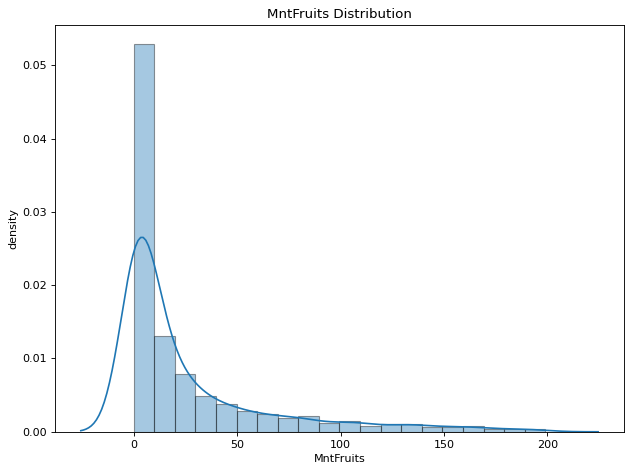

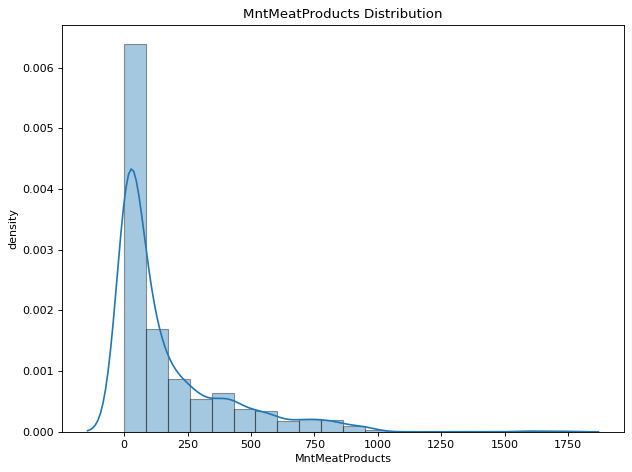

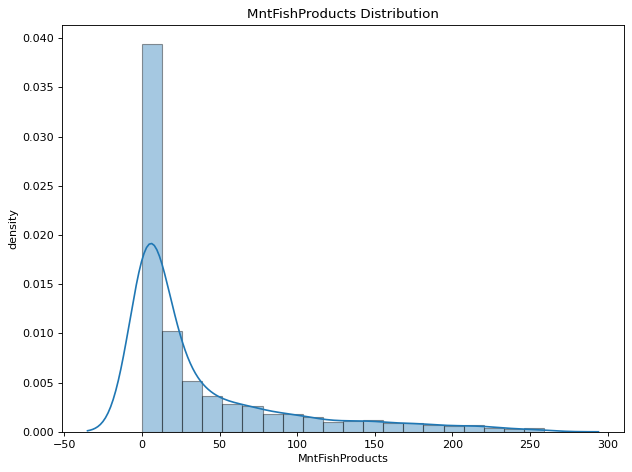

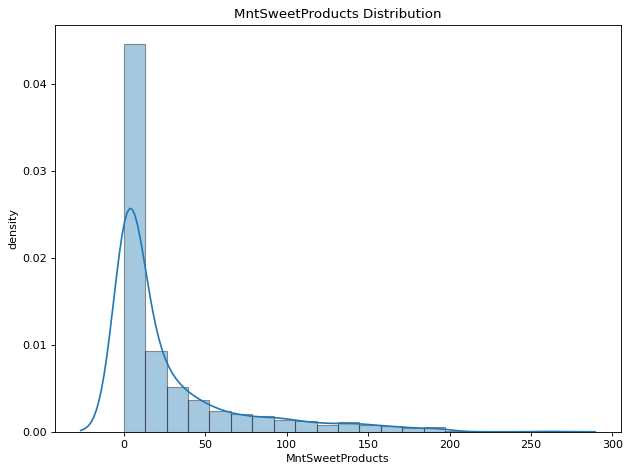

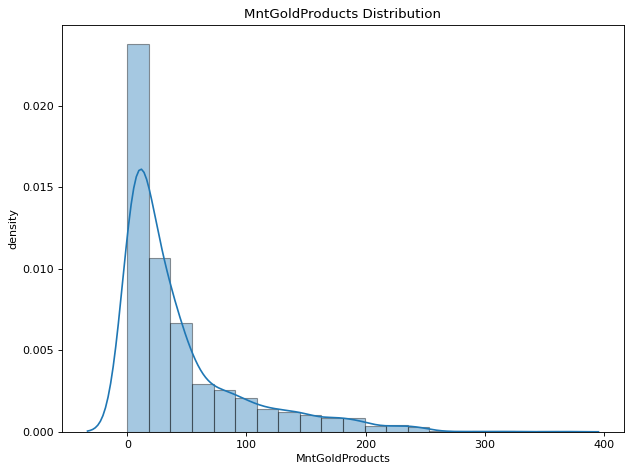

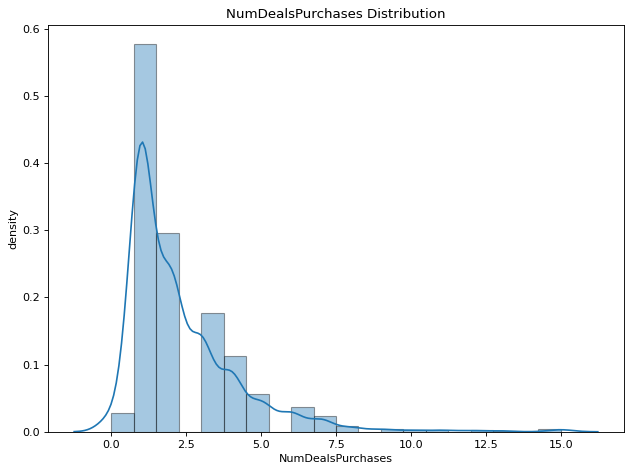

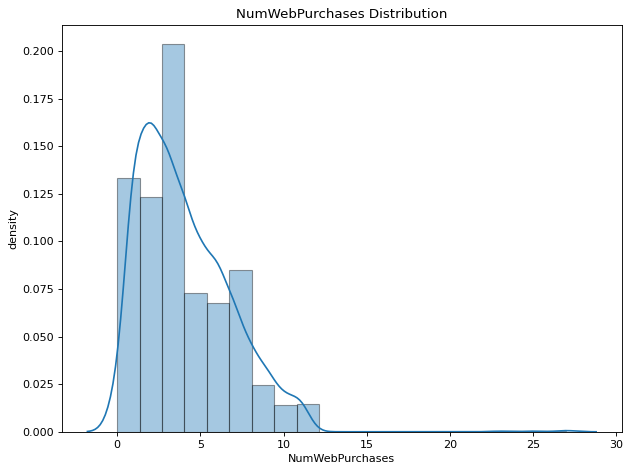

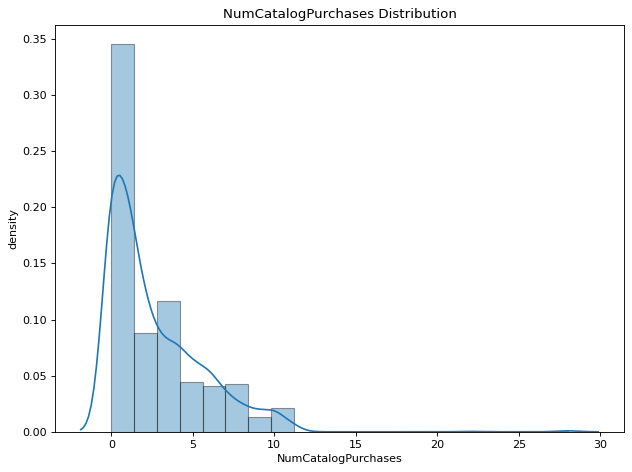

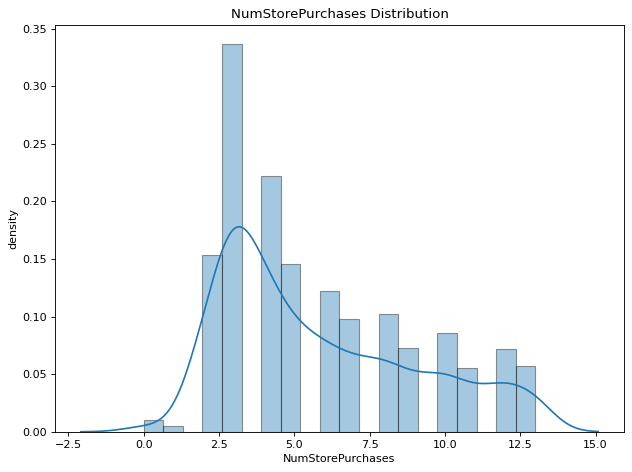

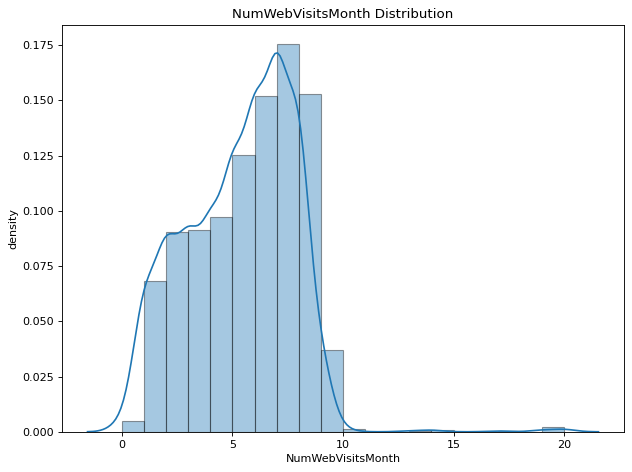

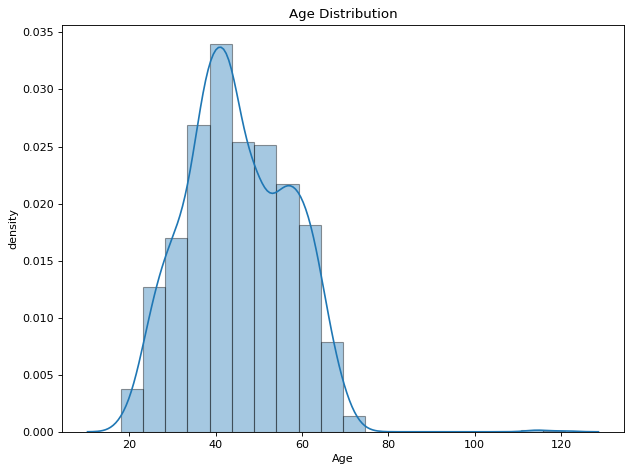

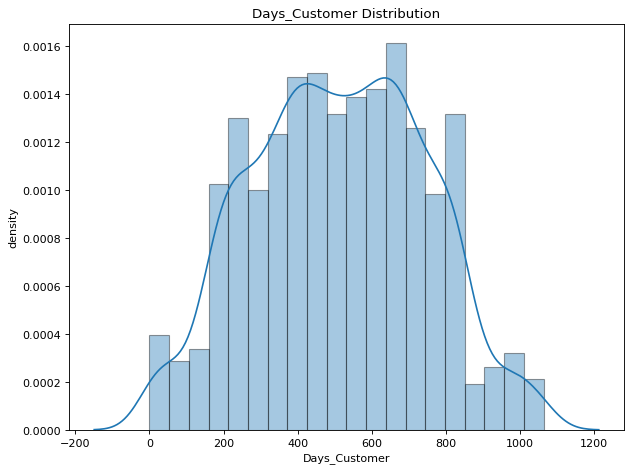

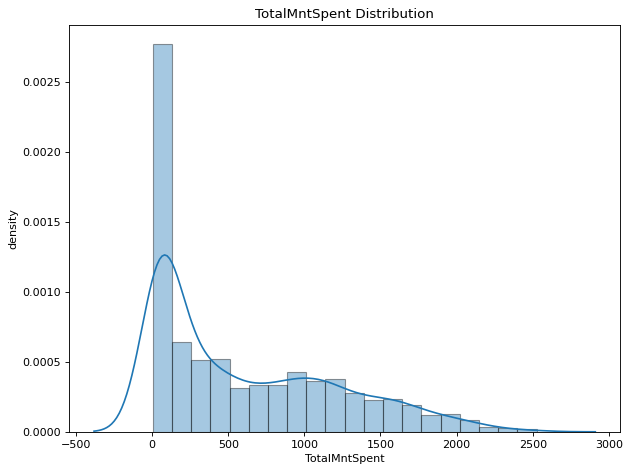

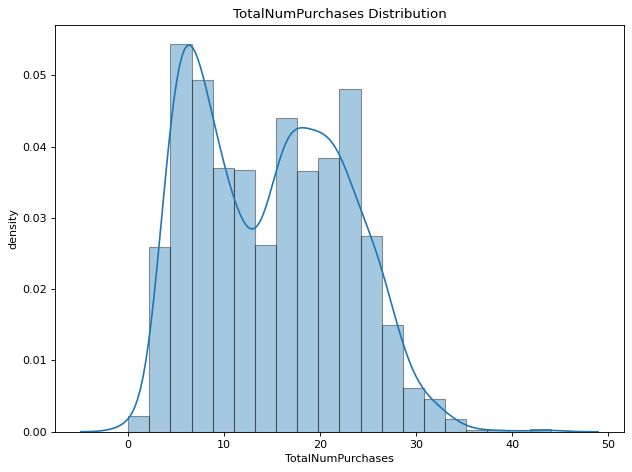

In [21]:
for col in num_columns :
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[col], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(col + ' Distribution')
    plt.ylabel("density")
    
    plt.tight_layout()
    plt.show()

### Inference (3)
**Income:**
* Majority of customers have income between 0 to 100000
* income seems to be normally distributed
* There are few outliers on therightside and slightly right-skwed

**Recency:**
* Recency distribution seems to be fluctuating
* There are no outliers present

**Amount Spend On Different Products:**
* All the graphs are highly skewed towards rightside
* Thre seems to be outliers on rightside of few distributions
* Majority of customers spent less than 80 on wines
* Majority of customers spent less than 50 on fruits, fish and sweets
* Majority of customers spent less than 200 on meat
* Majority of customers spent less than 100 on Gold
* Majority of customers overall spent less than 150

**Customers have spent more money on meat, wines and gold**

**Age:**
* Majority of customers are between 46 to 50
* The distribution is slightly skewed and has few outliers

**Number Of Purchases:**
* All the ditributions of number of purchases through different mediums are right skewed and have outliers except NumStorePurchases
* It seems like most of the cutomers purchased products through stores
* Less amout of purchases are made through cataloge
* Number of purchases made using deals are beetween 0 to 2
* Total number of purchases made by customers in last 2 months is between 2 to 8

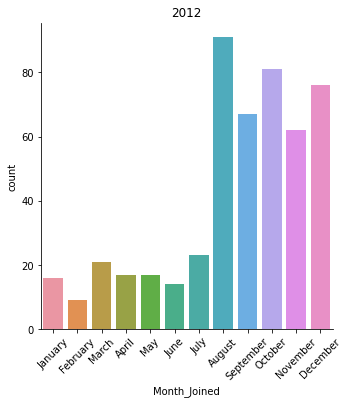

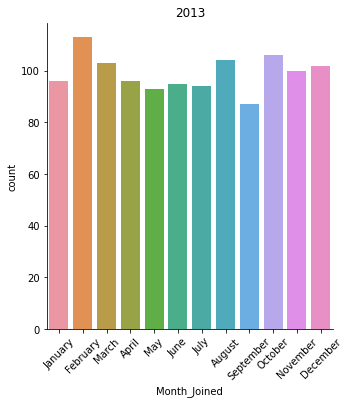

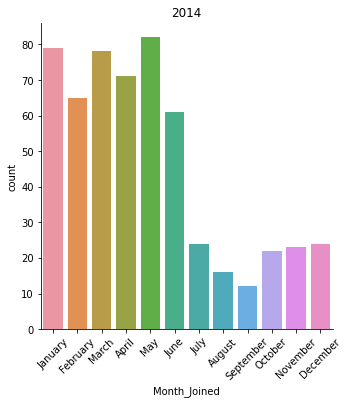

In [22]:
for i in [2012,2013,2014]:
    sns.catplot(data= df[df['Year_Joined']==i], x='Month_Joined', kind='count', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.xticks(
    rotation=45)
    plt.title(i)
    plt.show()

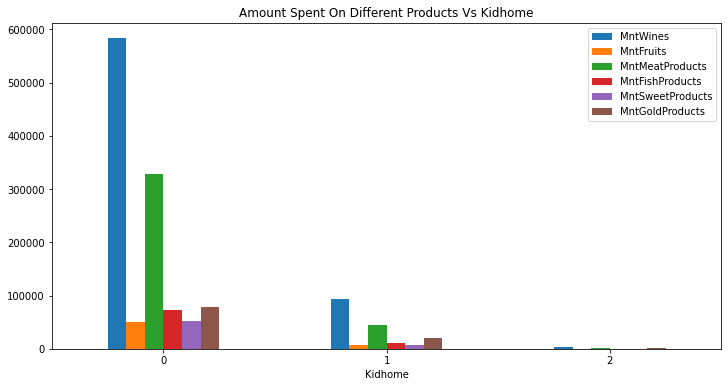

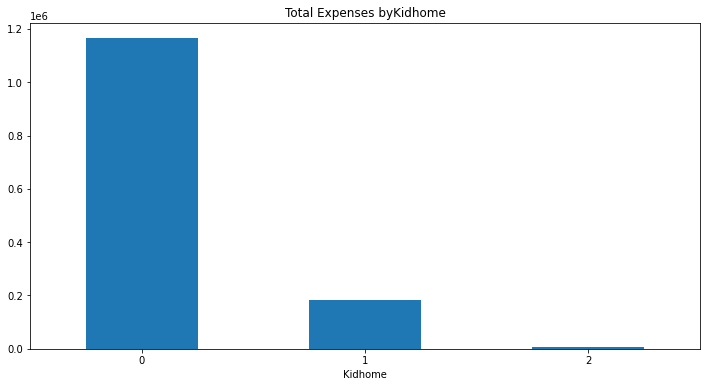

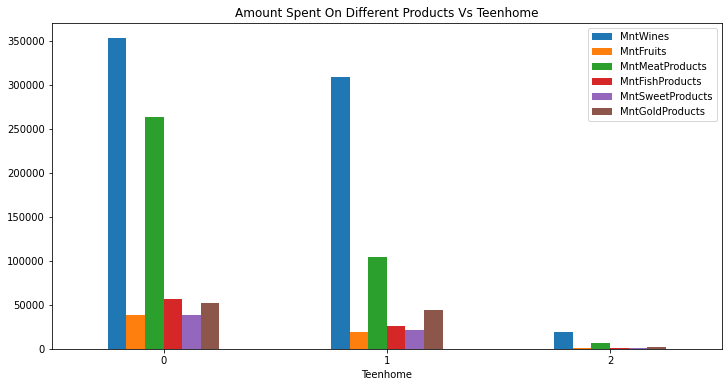

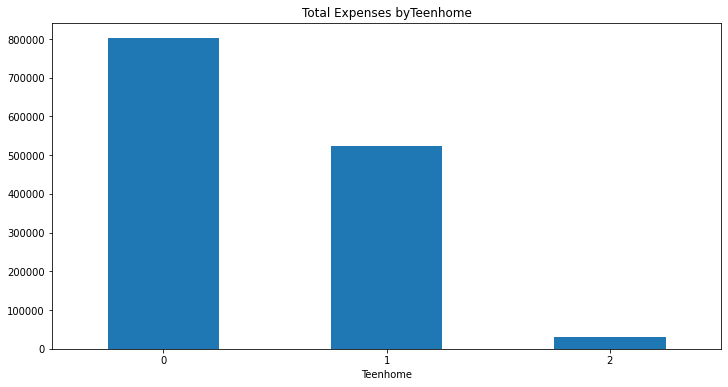

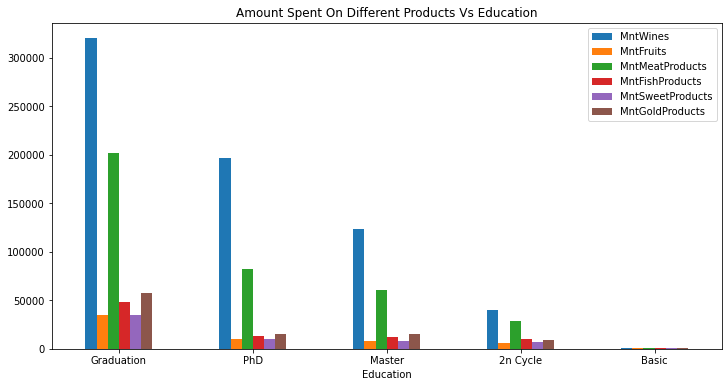

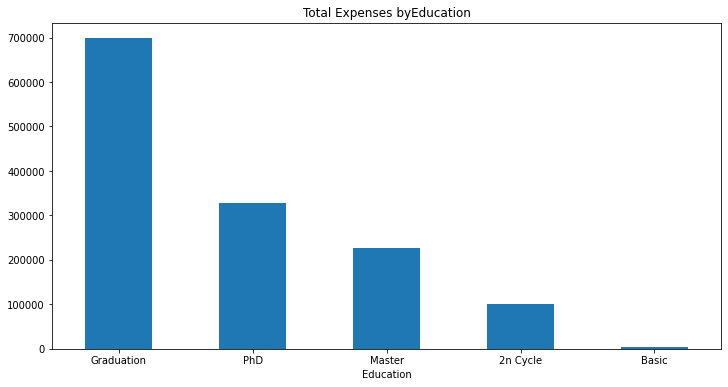

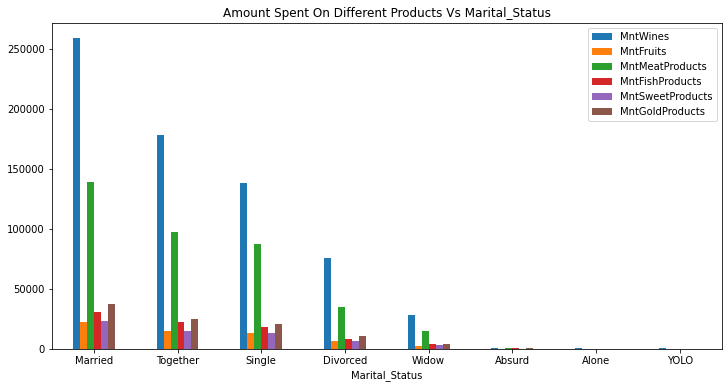

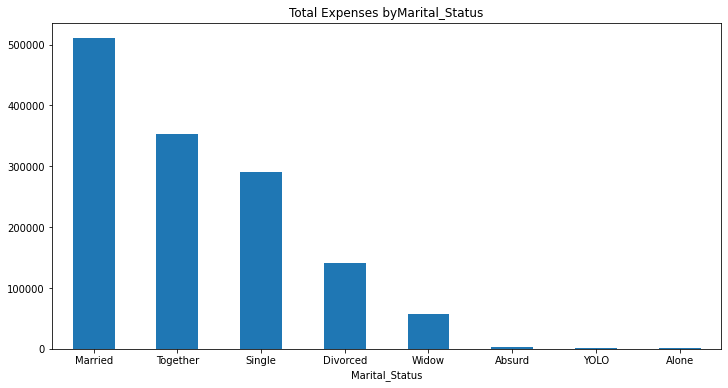

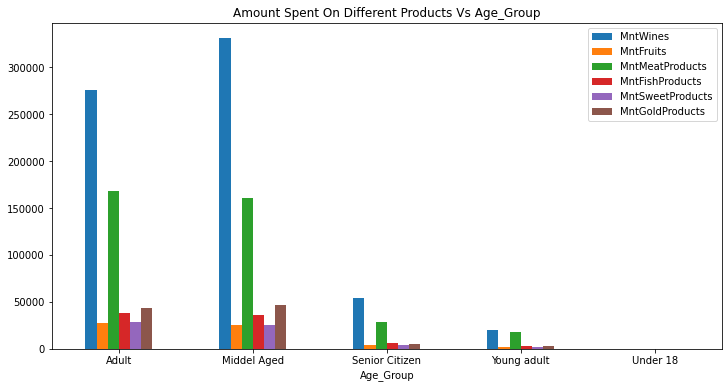

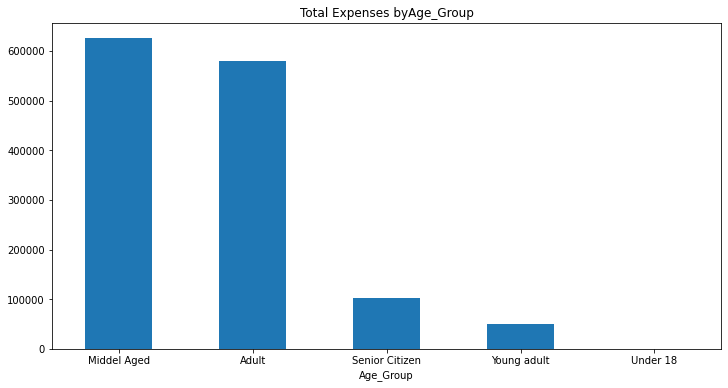

In [23]:
for col in ['Kidhome','Teenhome','Education','Marital_Status','Age_Group']:
    
    df.groupby(col)[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProducts']].sum().sort_values(by='MntSweetProducts' , ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Amount Spent On Different Products Vs '+col)
    plt.xticks(rotation = 360)
    
    df[[col,'TotalMntSpent']].groupby(col).sum().sort_values(by='TotalMntSpent', ascending=False).plot(kind='bar',legend=None, figsize = (12, 6))
    plt.title('Total Expenses by' + col)
    plt.xticks(rotation = 360)
    
    plt.show()

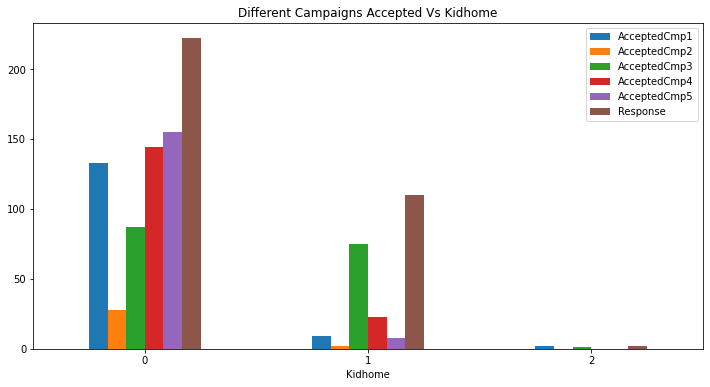

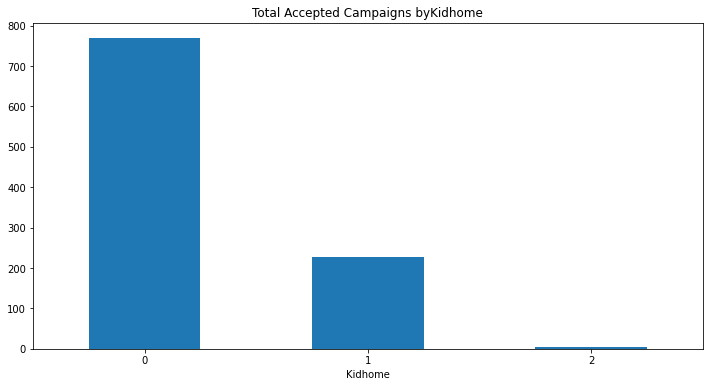

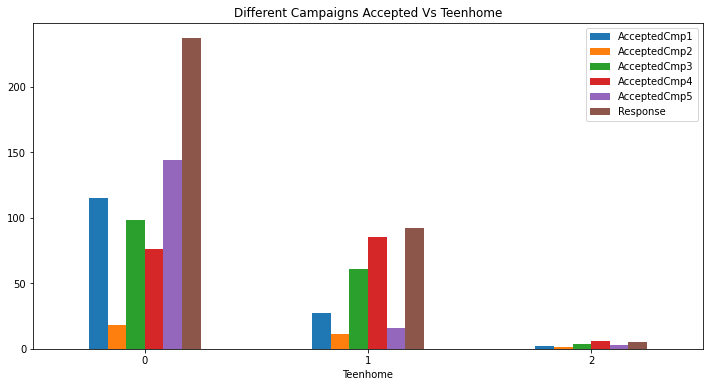

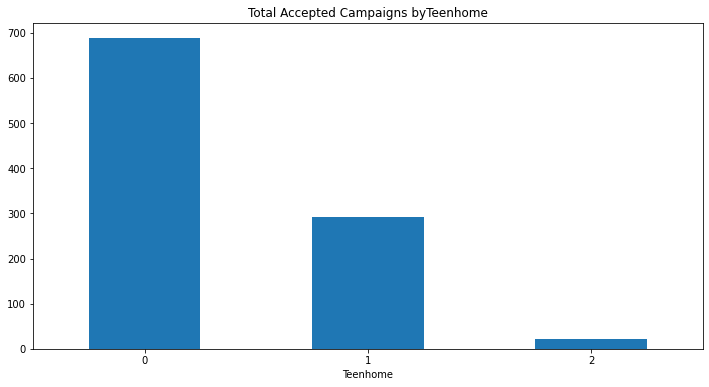

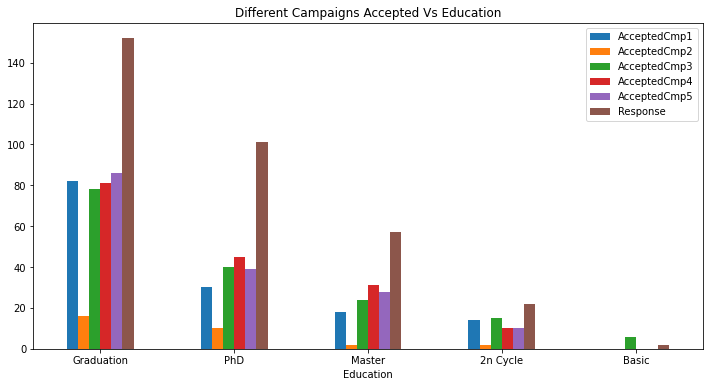

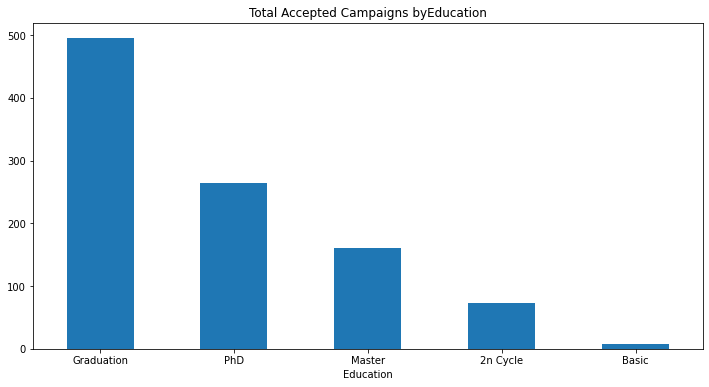

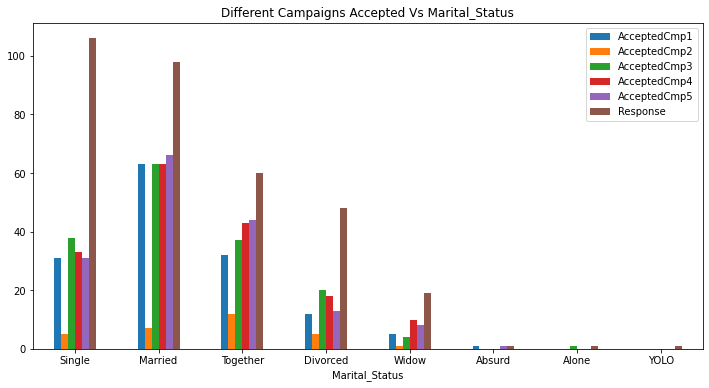

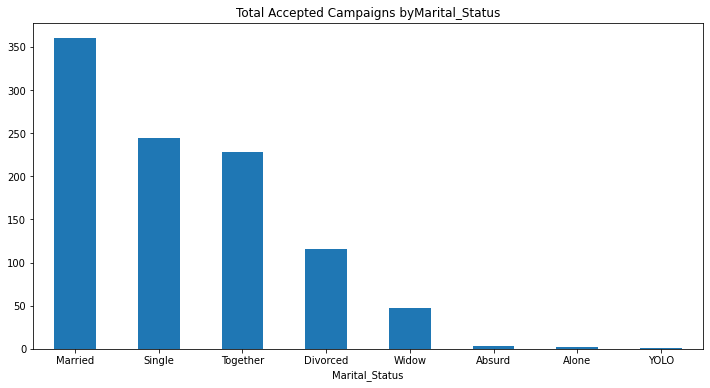

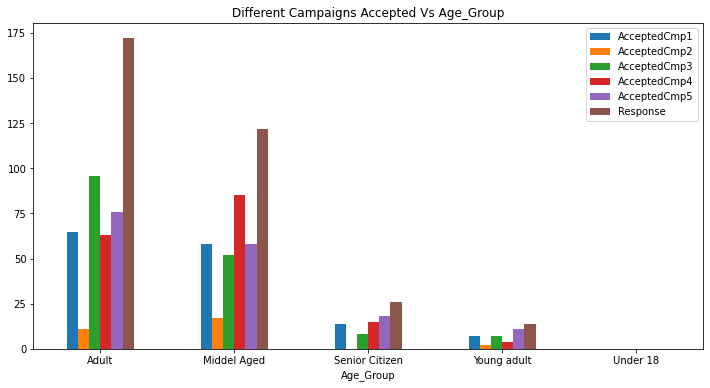

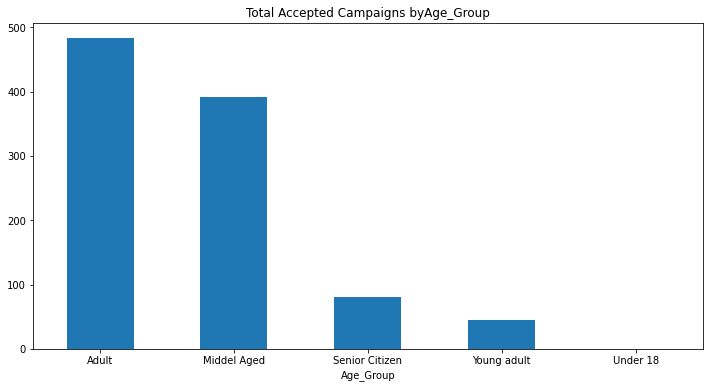

In [24]:
for col in ['Kidhome','Teenhome','Education','Marital_Status','Age_Group']:
    df.groupby(col)[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().sort_values(by='Response', ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Different Campaigns Accepted Vs '+col)
    plt.xticks(rotation = 360)
    
    df[[col,'Total_Acc_Cmp']].groupby(col).sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar',legend=None, figsize = (12, 6))
    plt.xticks(rotation=360)
    plt.title('Total Accepted Campaigns by' + col)
    
    plt.show()

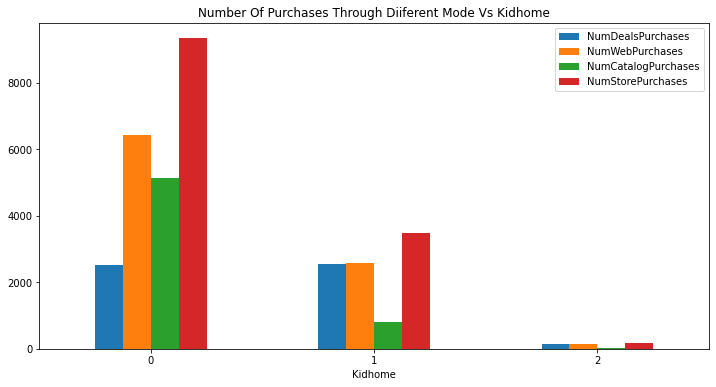

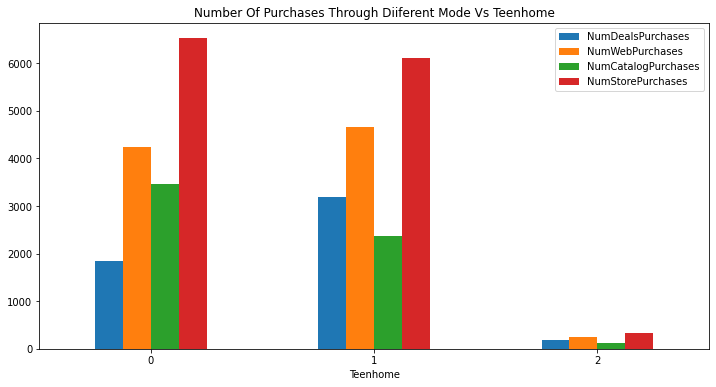

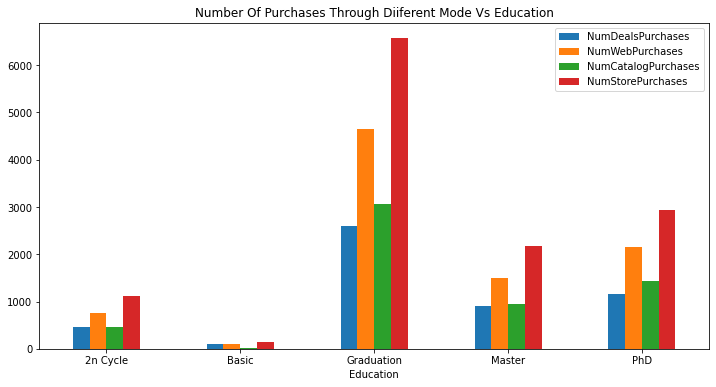

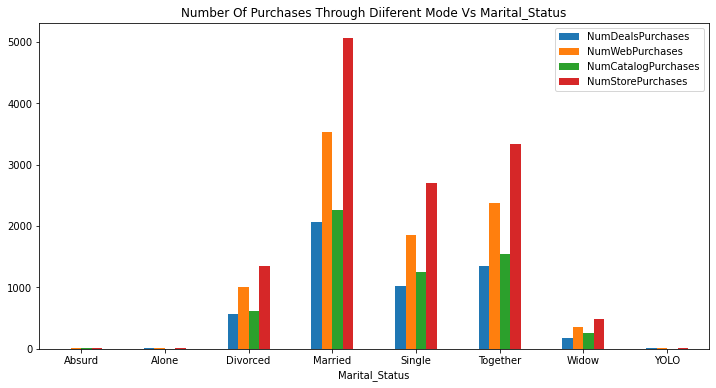

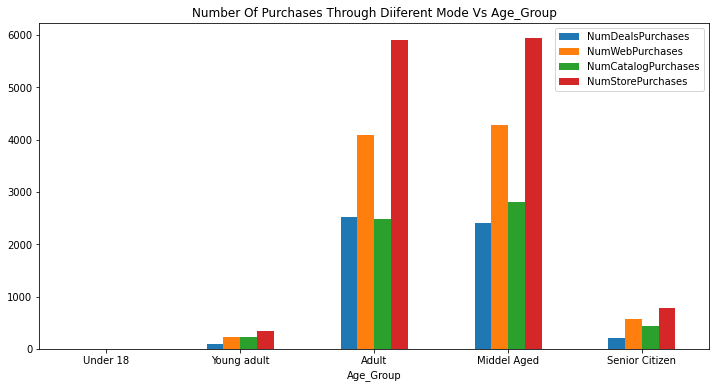

In [25]:
for col in ['Kidhome','Teenhome','Education','Marital_Status','Age_Group']:
    df.groupby(col)[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().plot(kind='bar',figsize = (12, 6))
    plt.title('Number Of Purchases Through Diiferent Mode Vs '+col)
    plt.xticks(rotation = 360)
    plt.show()

### Horizontal Bar Plot

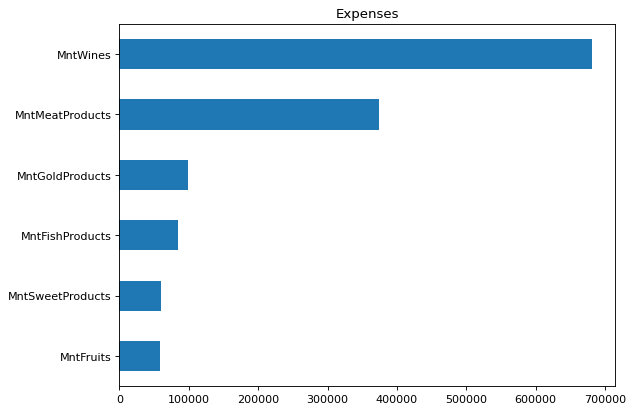

In [26]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses')
plt.show()

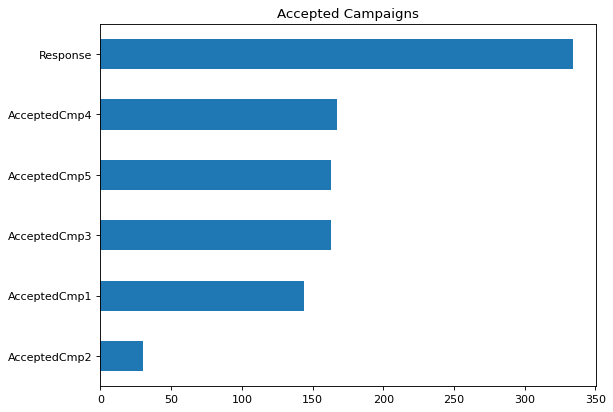

In [27]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaigns')
plt.show()

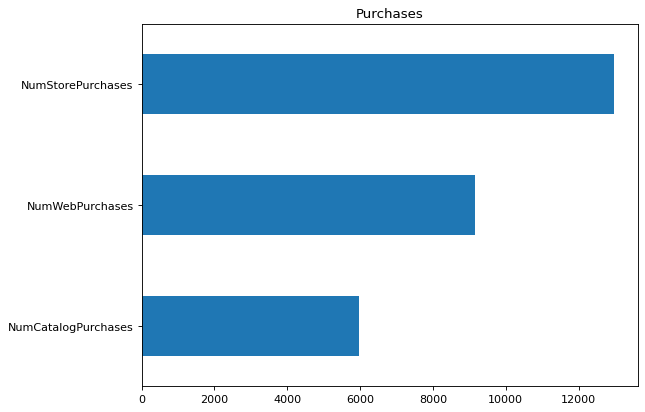

In [28]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases')
plt.show()

### Inferences
* Most amount of money is spent on wine and meat by customers and minimum on fruits and sweets

* Majority of customers like to purchase through store

* The chances of accepting an offer in campaign increases with the number of campaigns, maximum amount of customers accepted the last campaign offer